<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Tackling an NLP Problem with Naive Bayes
_Author: Matt Brems_

----

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we are going to apply a **new** modeling technique to natural language processing data.

> "But how can we apply a modeling technique we haven't learned?!"

The DSI program is great - but we can't teach you *everything* about data science in 12 weeks! This lab is designed to help you start learning something new without it being taught in a formal lesson. 
- Later in the cohort (like for your capstone!), you'll be exploring models, libraries, and resources that you haven't been explicitly taught.
- After the program, you'll want to continue developing your skills. Being comfortable with documentation and being confident in your ability to read something new and decide whether or not it is an appropriate method for the problem you're trying to solve is **incredibly** valuable.

### Step 1: Define the problem.

Many organizations have a substantial interest in classifying users of their product into groups. Some examples:
- A company that serves as a marketplace may want to predict who is likely to purchase a certain type of product on their platform, like books, cars, or food.
- An application developer may want to identify which individuals are willing to pay money for "bonus features" or to upgrade their app.
- A social media organization may want to identify who generates the highest rate of content that later goes "viral."

### Summary
In this lab, you're an engineer for Facebook. In recent years, the organization Cambridge Analytica gained worldwide notoriety for its use of Facebook data in an attempt to sway electoral outcomes.

Cambridge Analytica, an organization staffed with lots of Ph.D. researchers, used the Big5 personality groupings (also called OCEAN) to group people into one of 32 different groups.
- The five qualities measured by this personality assessment are:
    - **O**penness
    - **C**onscientiousness
    - **E**xtroversion
    - **A**greeableness
    - **N**euroticism
- Each person could be classified as "Yes" or "No" for each of the five qualities.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$)
- You don't have to check it out, but if you want to learn more about this personality assessment, head to [the Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits).
- There's also [a short (3-4 pages) academic paper describing part of this approach](./celli-al_wcpr13.pdf).

Cambridge Analytica's methodology was, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big5 personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

You want to know the **real-world problem**: "Is what Cambridge Analytica attempted to do actually possible, or is it junk science?"

However, we'll solve the related **data science problem**: "Are one's Facebook statuses predictive of whether or not one is agreeable?"
> Note: If Facebook statuses aren't predictive of one being agreeable (one of the OCEAN qualities), then Cambridge Analytica's approach won't work very well!

### Step 2: Obtain the data.

Obviously, there are plenty of opportunities to discuss the ethics surrounding this particular issue... so let's do that.

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [2]:
# import data
data = pd.read_csv('./mypersonality_final.csv', encoding = 'ISO-8859-1')

In [3]:
# display 5 rows
data.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


**1. What is the difference between anonymity and confidentiality? All else held equal, which tends to keep people safer?**

No, confidentiality is tends to keep people safer than anonymity because anonymity can share to others with hiding username or id but if confidentiality we can't share to others.

**2. Suppose that the "unique identifier" in the above data, the `#AUTHID`, is a randomly generated key so that it can never be connected back to the original poster. Have we guaranteed anonymity here? Why or why not?**

We already have guaranteed. because users who use this data can't connected to the original post.

**3. As an engineer for Facebook, you recognize that user data will be used by Facebook and by other organizations - that won't change. However, what are at least three recommendations you would bring to your manager to improve how data is used and shared? Be as specific as you can.**

1. remove date from data to make sure that other people who use this data will not go search or find the way to connected user in facebook.
2. create random id or remove id in data to make sure that users in this data will be safe.
3. if there are user name in status it also should to be remove to make sure that user will be safe.

### Step 3: Explore the data.

- Note: For our $X$ variable, we will only use the `STATUS` variable. For our $Y$ variable, we will only use the `cAGR` variable.

**4. Explore the data here.**
> We aren't explicitly asking you to do specific EDA here, but what EDA would you generally do with this data? Do the EDA you usually would, especially if you know what the goal of this analysis is.

In [4]:
# create new data that store status and cAGR
new_data = data[['STATUS', 'cAGR']]

In [5]:
# check target which is balance or not
new_data['cAGR'].value_counts(normalize=True).mul(100)

y    53.120903
n    46.879097
Name: cAGR, dtype: float64

In [8]:
# Instantiate CountVectorizer
cvec = CountVectorizer(stop_words='english')
# fit and tranform status column
status_cvec = cvec.fit_transform(data['STATUS'])
# store to dataframe
status_cvec_df = pd.DataFrame(status_cvec.todense(), columns=cvec.get_feature_names_out())

In [11]:
# concat cAGR and Count-vectorized status 
text_and_scores = pd.concat([data['cAGR'], status_cvec_df], axis=1)
# show 25 most common words form high-cAGR
high_cAGR = text_and_scores[text_and_scores['cAGR'] == 'y'].drop('cAGR', axis=1).sum().sort_values(ascending=False).head(25)
high_cAGR

propname    699
just        402
day         297
like        280
time        221
today       219
work        206
good        201
going       200
new         194
love        172
happy       165
night       161
got         157
know        157
people      156
tomorrow    153
life        140
home        131
tonight     129
really      127
don         119
want        108
weekend     105
ll          103
dtype: int64

In [12]:
# show 25 most common words form low-cAGR
low_cAGR = text_and_scores[text_and_scores['cAGR'] == 'n'].drop('cAGR', axis=1).sum().sort_values(ascending=False).head(25)
low_cAGR

propname    610
just        315
day         237
like        226
going       214
time        203
new         192
today       183
work        163
got         157
good        153
night       151
home        136
don         134
tonight     127
tomorrow    124
love        120
life        120
know        119
really      119
people      112
think       110
want        109
happy       107
week         98
dtype: int64

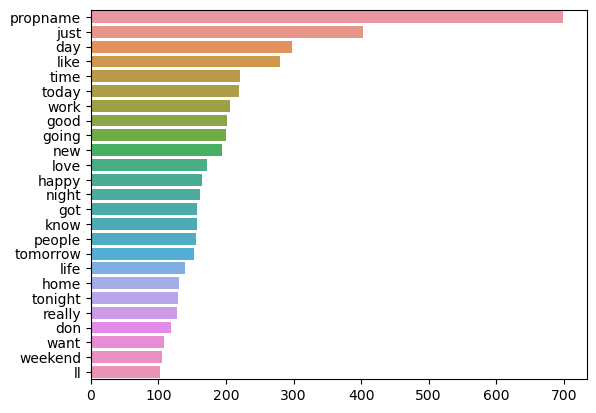

In [23]:
sns.barplot(x=high_cAGR, y=high_cAGR.index);

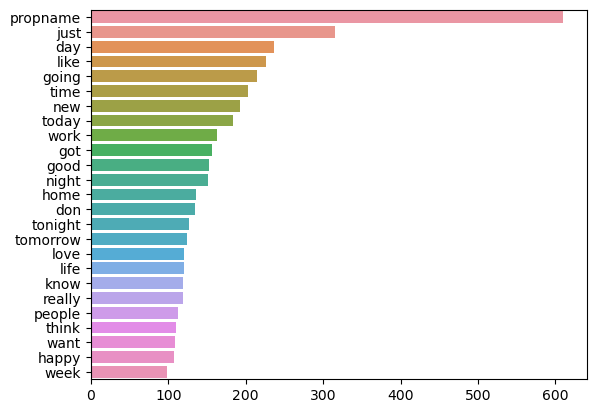

In [22]:
sns.barplot(x=low_cAGR, y=low_cAGR.index);

**5. What is the difference between CountVectorizer and TFIDFVectorizer?**

**Countvectorizer**
   - count frequent of the word in document which can be 0 or 1 or more than one

**TFIDFVectorizer**
   - count word over all word in that document and then multiply by inverse document frequency.

**6. What are stopwords?**

Words that when split have no meaning. <br>  
e.g. I, and, you

**7. Give an example of when you might remove stopwords.**

When score from model is bad.

**8. Give an example of when you might keep stopwords in your model.**

When score from model is good enough.

### Step 4: Model the data.

We are going to fit two types of models: a logistic regression and [a Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html).

**Reminder:** We will only use the feature `STATUS` to model `cAGR`.

### We want to attempt to fit our models on sixteen sets of features:

1. CountVectorizer with 100 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
2. CountVectorizer with 100 features, with English stopwords removed and with the default `ngram_range`.
3. CountVectorizer with 100 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
4. CountVectorizer with 100 features, with English stopwords kept in and with the default `ngram_range`.
5. CountVectorizer with 500 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
6. CountVectorizer with 500 features, with English stopwords removed and with the default `ngram_range`.
7. CountVectorizer with 500 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
8. CountVectorizer with 500 features, with English stopwords kept in and with the default `ngram_range`.
9. TFIDFVectorizer with 100 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
10. TFIDFVectorizer with 100 features, with English stopwords removed and with the default `ngram_range`.
11. TFIDFVectorizer with 100 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
12. TFIDFVectorizer with 100 features, with English stopwords kept in and with the default `ngram_range`.
13. TFIDFVectorizer with 500 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
14. TFIDFVectorizer with 500 features, with English stopwords removed and with the default `ngram_range`.
15. TFIDFVectorizer with 500 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
16. TFIDFVectorizer with 500 features, with English stopwords kept in and with the default `ngram_range`.

**9. Rather than manually instantiating 16 different vectorizers, what `sklearn` class have we learned about that might make this easier? Use it.**

GridsearchCV

**10. What are some of the advantages of fitting a logistic regression model?**

Logistic regression has coefficient which we can interpret what words are affect when predict.

**11. Fit a logistic regression model and compare it to the baseline.**

In [ ]:
# baseline
data['cAGR'].value_counts(normalize=True).mul(100)

# accuracy 53%

In [ ]:
# create feature and target
X = data['STATUS']
y = data['cAGR']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=22)

### Countvectorizer

In [ ]:
#instantiate pipeline countvectorizer and logreg
pipe_logreg = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression(max_iter=200))
])

In [ ]:
# tune cvec hyperparameter
pipe_logreg_param = {
    'cvec__max_features' : [100, 500],
    'cvec__stop_words' : [None, 'english'],
    'cvec__ngram_range' : [(1, 1), (1, 2)]
}

In [ ]:
# fit model
logreg_gs = GridSearchCV(pipe_logreg, pipe_logreg_param)
logreg_gs.fit(X_train, y_train)

In [ ]:
# best param
logreg_gs.best_params_

In [ ]:
# evaluate model
print('train score', logreg_gs.score(X_train, y_train))
print('test score', logreg_gs.score(X_test, y_test))

In [ ]:
# confusion matrix
confusion_matrix(y_test, logreg_gs.predict(X_test))

### TFIDFVectorizer

In [ ]:
#instantiate pipeline tfidfvectorizer and logreg
pipe_tlogreg = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression(max_iter=200))
])

In [ ]:
# tune cvec hyperparameter
pipe_tlogreg_param = {
    'tvec__max_features' : [100, 500],
    'tvec__stop_words' : [None, 'english'],
    'tvec__ngram_range' : [(1, 1), (1, 2)]
}

In [ ]:
# fit model
tlogreg_gs = GridSearchCV(pipe_tlogreg, pipe_tlogreg_param)
tlogreg_gs.fit(X_train, y_train)

In [ ]:
# best param
tlogreg_gs.best_params_

In [ ]:
# evaluate model
print('train score', tlogreg_gs.score(X_train, y_train))
print('test score', tlogreg_gs.score(X_test, y_test))

In [ ]:
# confusion matrix
confusion_matrix(y_test, tlogreg_gs.predict(X_test))

### Summary of Naive Bayes 

Naive Bayes is a classification technique that relies on probability to classify observations.
- It's based on a probability rule called **Bayes' Theorem**... thus, "**Bayes**."
- It makes an assumption that isn't often met, so it's "**naive**."

Despite being a model that relies on a naive assumption, it often performs pretty well! (This is kind of like linear regression... we aren't always guaranteed homoscedastic errors in linear regression, but the model might still do a good job regardless.)
- [Interested in details? Read more here if you want.](https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf)


The [sklearn documentation](https://scikit-learn.org/stable/modules/naive_bayes.html) is here, but it can be intimidating. So, to quickly summarize the Bayes and Naive parts of the model...

#### Bayes' Theorem
If you've seen Bayes' Theorem, it relates the probability of $P(A|B)$ to $P(B|A)$. (Don't worry; we won't be doing any probability calculations by hand! However, you may want to refresh your memory on conditional probability from our earlier lessons if you forget what a conditional probability is.)

$$
\begin{eqnarray*}
\text{Bayes' Theorem: } P(A|B) &=& \frac{P(B|A)P(A)}{P(B)}
\end{eqnarray*}
$$

- Let $A$ be that someone is "agreeable," like the OCEAN category.
- Let $B$ represent the words used in their Facebook post.

$$
\begin{eqnarray*}
\text{Bayes' Theorem: } P(A|B) &=& \frac{P(B|A)P(A)}{P(B)} \\
\Rightarrow P(\text{person is agreeable}|\text{words in Facebook post}) &=& \frac{P(\text{words in Facebook post}|\text{person is agreeable})P(\text{person is agreeable})}{P(\text{words in Facebook post})}
\end{eqnarray*}
$$

We want to calculate the probability that someone is agreeable **given** the words that they used in their Facebook post! (Rather than calculating this probability by hand, this is done under the hood and we can just see the results by checking `.predict_proba()`.) However, this is exactly what our model is doing. We can (a.k.a. the model can) calculate the pieces on the right-hand side of the equation to give us a probability estimate of how likely someone is to be agreeable given their Facebook post.

#### Naive Assumption

If our goal is to estimate $P(\text{person is agreeable}|\text{words in Facebook post})$, that can be quite tricky.

---

<details><summary>Bonus: if you want to understand why that's complicated, click here.</summary>
    
- The event $\text{"words in Facebook post"}$ is a complicated event to calculate.

- If a Facebook post has 100 words in it, then the event $\text{"words in Facebook post"} = \text{"word 1 is in the Facebook post" and "word 2 is in the Facebook post" and }\ldots \text{ and "word 100 is in the Facebook post"}$.

- To calculate the joint probability of all 100 words being in the Facebook post gets complicated pretty quickly. (Refer back to the probability notes on how to calculate the joint probability of two events if you want to see more.)
</details>

---

To simplify matters, we make an assumption: **we assume that all of our features are independent of one another.**

In some contexts, this assumption might be realistic!

**12. Why would this assumption not be realistic with NLP data?**

because all the words always be dependence the context or something else.

Despite this assumption not being realistic with NLP data, we still use Naive Bayes pretty frequently.
- It's a very fast modeling algorithm. (which is great especially when we have lots of features and/or lots of data!)
- It is often an excellent classifier, outperforming more complicated models.

There are three common types of Naive Bayes models: Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes.
- How do we pick which of the three models to use? It depends on our $X$ variable.
    - Bernoulli Naive Bayes is appropriate when our features are all 0/1 variables.
        - [Bernoulli NB Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)
    - Multinomial Naive Bayes is appropriate when our features are variables that take on only positive integer counts.
        - [Multinomial NB Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
    - Gaussian Naive Bayes is appropriate when our features are Normally distributed variables. (Realistically, though, we kind of use Gaussian whenever neither Bernoulli nor Multinomial works.)
        - [Gaussian NB Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

**13. Suppose you CountVectorized your features. Which Naive Bayes model would be most appropriate to fit? Why? Fit it.**

Multinomial Naive bayes is the most appropriate to fit Because feature is store in 0 or 1 it can be more than one.

In [ ]:
#instantiate pipeline countvectorizer and logreg
pipe_nb = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
# tune cvec hyperparameter
pipe_nb_param = {
    'cvec__max_features' : [100, 500],
    'cvec__stop_words' : [None, 'english'],
    'cvec__ngram_range' : [(1, 1), (1, 2)]
}

In [ ]:
# fit model
nb_gs = GridSearchCV(pipe_nb, pipe_nb_param)
nb_gs.fit(X_train, y_train)

In [ ]:
# best param
nb_gs.best_params_

In [ ]:
# evaluate model
print('train score', nb_gs.score(X_train, y_train))
print('test score', nb_gs.score(X_test, y_test))

In [ ]:
# confusion matrix
confusion_matrix(y_test, nb_gs.predict(X_test))

**14. Suppose you TFIDFVectorized your features. Which Naive Bayes model would be most appropriate to fit? Why? Fit it.**

Multinomial Naive bayes is the most appropriate to fit Because feature is store in 0 or 1 it can be more than one.

In [ ]:
#instantiate pipeline tfidfvectorizer and logreg
pipe_tnb = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
# tune cvec hyperparameter
pipe_tnb_param = {
    'tvec__max_features' : [100, 500],
    'tvec__stop_words' : [None, 'english'],
    'tvec__ngram_range' : [(1, 1), (1, 2)]
}

In [ ]:
# fit model
tnb_gs = GridSearchCV(pipe_tnb, pipe_tnb_param)
tnb_gs.fit(X_train, y_train)

In [ ]:
# best param
tnb_gs.best_params_

In [ ]:
# evaluate model
print('train score', tnb_gs.score(X_train, y_train))
print('test score', tnb_gs.score(X_test, y_test))

In [ ]:
# confusion matrix
confusion_matrix(y_test, tnb_gs.predict(X_test))

**15. Compare the performance of your models.**

In [ ]:
# baseline
y.value_counts(normalize=True).mul(100).round(2)

In [ ]:
# create dataframe store rmse on train and test
f1_df = pd.DataFrame(columns=['model', 'f1_train', 'f1_test'])

for i, m in enumerate([logreg_gs, tlogreg_gs, nb_gs, tnb_gs]):
    f1_train = f1_score(y_train, m.predict(X_train), pos_label='y')
    f1_test = f1_score(y_test, m.predict(X_test), pos_label='y')
    f1_df.loc[i] = [str(m), f1_train, f1_test]

# calculate value different between rmse train and test
f1_df['diff'] = f1_df['f1_train'] - f1_df['f1_test']
f1_df

All models are overfitting which need to tune hyperparameter. <br>
All models can't significant beat baseline score. <br>
From my assumption that because the documets have no pattern which who are agreeableness use the words different from who are not agreeableness.

**16. Even though we didn't explore the full extent of Cambridge Analytica's modeling, based on what we did here, how effective was their approach at using Facebook data to model agreeableness?**

If use only words(Status) to predict who are agreeableness base on this data I think it not effective to predict who are agreaableness because the words have no pattern to detect who are agreeableness or not.